<b>¡Hola Ricardo!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Paso 1. Abrir el archivo de datos y leer la información general

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from datetime import datetime
from scipy.stats import mannwhitneyu
from IPython.display import display

In [2]:
# Cargo el dataset y separo las columnas 
aab_original = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

print(aab_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


# Paso 2. Preparar los datos para el análisis

In [3]:
# Convierto a datetime la columna EventTimesstamp
aab_original['EventTimestamp'] = pd.to_datetime(aab_original['EventTimestamp'], unit='s')

# Cambio el nombre de las columnas a mi conveniencia
aab_original = aab_original.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'device_id',
    'EventTimestamp': 'event_timestamp',
    'ExpId': 'exp_id'
})

# Creo columna con solo la fecha
aab_original['event_date'] = aab_original['event_timestamp'].dt.date

# Verifico valores ausentes
print("\nValores nulos por columna:")
print(aab_original.isnull().sum())

print(aab_original)


Valores nulos por columna:
event_name         0
device_id          0
event_timestamp    0
exp_id             0
event_date         0
dtype: int64
                     event_name            device_id     event_timestamp  \
0              MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1              MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2       PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3              CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4       PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   
...                         ...                  ...                 ...   
244121         MainScreenAppear  4599628364049201812 2019-08-07 21:12:25   
244122         MainScreenAppear  5849806612437486590 2019-08-07 21:13:59   
244123         MainScreenAppear  5746969938801999050 2019-08-07 21:14:43   
244124         MainScreenAppear  5746969938801999050 2019-08-07 21:14:58   
244125       Offer

# Paso 3. Estudiar y comprobar los datos

## ¿Cuántos eventos hay en los registros?

In [4]:
# Analiso el numero de cada evento
eventos = aab_original['event_name'].value_counts()

print(eventos)

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64


In [5]:
# Veo cuantos eventos unicos hay en el dataset
total_eventos = aab_original['event_name'].nunique()

print(f"Total de eventos únicos: {total_eventos}")

Total de eventos únicos: 5


## ¿Cuántos usuarios hay en los registros?

In [6]:
# Veo cuantos usuarios unicos hay 
usuarios_unicos = aab_original['device_id'].nunique()

print(f"Total de usuarios únicos: {usuarios_unicos}")

Total de usuarios únicos: 7551


<div class="alert alert-block alert-success">
<b>Celdas [3–6]</b> <a class="tocSkip"></a><br>
Muy buen trabajo en la preparación inicial de los datos. Convertiste correctamente las marcas de tiempo, renombraste columnas con criterio, y generaste una columna adicional con solo la fecha para facilitar análisis posteriores. También verificaste la ausencia de valores nulos, lo cual es un excelente paso de validación antes de continuar. Todo el bloque muestra un flujo limpio y riguroso.
</div>


## ¿Cuál es el promedio de eventos por usuario?

In [7]:
# Imprimo el periodo de eventos por usuarios
total_eventos_2 = len(aab_original)
usuarios_unicos = aab_original['device_id'].nunique()

promedio_eventos_por_usuario = total_eventos_2 / usuarios_unicos
print(f"Promedio de eventos por usuario: {promedio_eventos_por_usuario:.2f}")


Promedio de eventos por usuario: 32.33


## ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. 

In [8]:
#imprimo el periodo que abarcan los datos
fecha_min = aab_original['event_timestamp'].min()
fecha_max = aab_original['event_timestamp'].max()

print(f"Periodo cubierto por los datos: {fecha_min} a {fecha_max}")


Periodo cubierto por los datos: 2019-07-25 04:43:36 a 2019-08-07 21:15:17


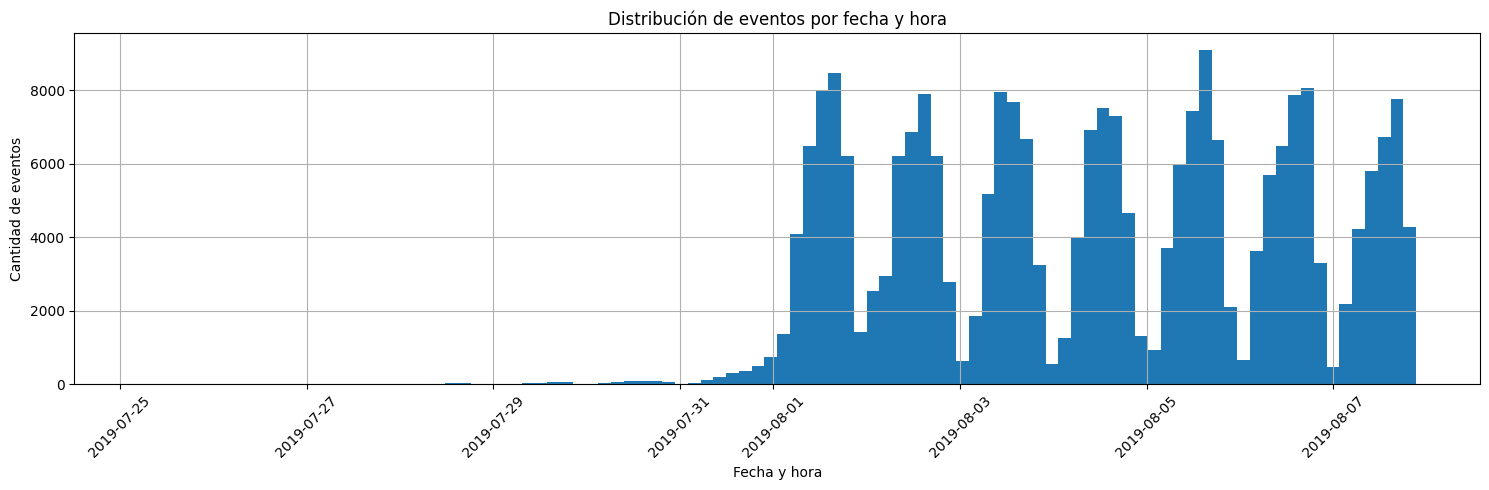

In [9]:
# Lo grafico
aab_original['event_timestamp'].hist(
    bins=100,  
    figsize=(15, 5)
)
plt.title('Distribución de eventos por fecha y hora')
plt.xlabel('Fecha y hora')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. 

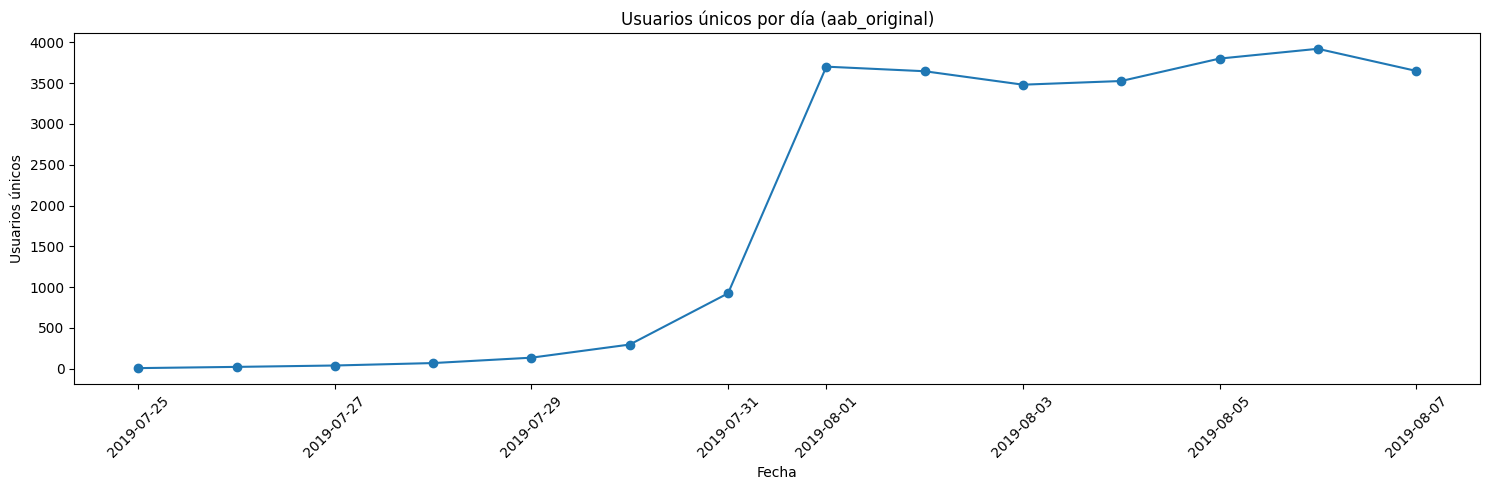

In [10]:
# Visualizo el momento en que empiezan estar completos los datos
usuarios_por_dia = aab_original.groupby(aab_original['event_timestamp'].dt.date)['device_id'].nunique()

usuarios_por_dia.plot(
    figsize=(15, 5),
    title='Usuarios únicos por día (aab_original)',
    marker='o'
)
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

event_timestamp
2019-07-25       7
2019-07-26      22
2019-07-27      39
2019-07-28      69
2019-07-29     135
2019-07-30     296
2019-07-31     924
2019-08-01    3703
2019-08-02    3647
2019-08-03    3482
Name: device_id, dtype: int64


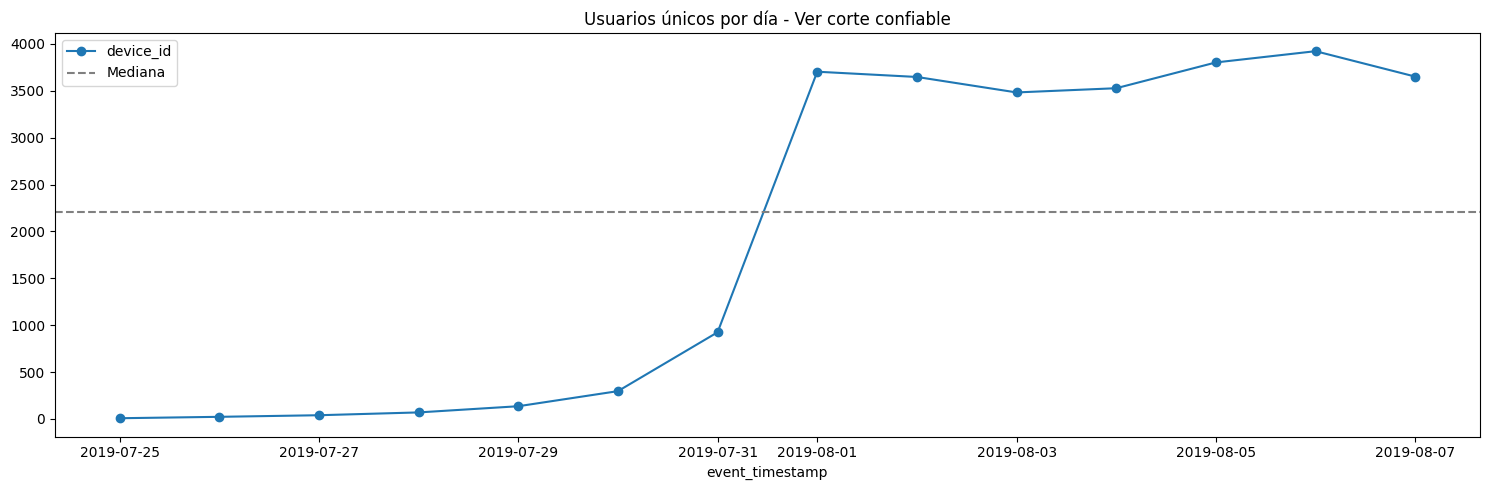

In [11]:
print(usuarios_por_dia.head(10))  

usuarios_por_dia.plot(marker='o', figsize=(15,5), title='Usuarios únicos por día - Ver corte confiable')
plt.axhline(usuarios_por_dia.median(), color='grey', linestyle='--', label='Mediana')
plt.legend()
plt.tight_layout()
plt.show()


## ¿Qué periodo representan realmente los datos?

In [12]:
# Encuentro el periodo que representan realmente los datos
fecha_inicio_valida = pd.to_datetime('2019-08-01')  
periodo_aab = aab_original[aab_original['event_timestamp'] >= fecha_inicio_valida]

fecha_inicio = periodo_aab['event_timestamp'].min()
fecha_fin = periodo_aab['event_timestamp'].max()

print(f"Los datos completos cubren el periodo del {fecha_inicio.date()} al {fecha_fin.date()}")


Los datos completos cubren el periodo del 2019-08-01 al 2019-08-07


## ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [13]:
# Veo cual fue la cantidad y el porcentaje de eventos perdidos
eventos_antes = len(aab_original)
eventos_despues = len(periodo_aab)

perdidos_eventos = eventos_antes - eventos_despues
porc_perdidos_eventos = perdidos_eventos / eventos_antes * 100

print(f"Eventos perdidos: {perdidos_eventos} ({porc_perdidos_eventos:.2f}%)")


Eventos perdidos: 2828 (1.16%)


<div class="alert alert-block alert-success">
<b>Celdas [10–13]</b> <a class="tocSkip"></a><br>
Excelente razonamiento al identificar el punto de corte para asegurar la completitud de los datos. La visualización de usuarios únicos por día, junto con el uso de la mediana como línea base, te permitió tomar una decisión sólida. Además, cuantificaste claramente la pérdida de datos al filtrar, demostrando que es despreciable. Esto refuerza la validez del análisis posterior.
</div>


In [14]:
# Y la catidad de usuarios que se perdieron
usuarios_antes = aab_original['device_id'].nunique()
usuarios_despues = periodo_aab['device_id'].nunique()

perdidos_usuarios = usuarios_antes - usuarios_despues
porc_perdidos_usuarios = perdidos_usuarios / usuarios_antes * 100

print(f"Usuarios perdidos: {perdidos_usuarios} ({porc_perdidos_usuarios:.2f}%)")


Usuarios perdidos: 17 (0.23%)


## Asegúrate de tener usuarios de los tres grupos experimentales.

In [15]:
# Me aseguro de que los 3 grupos sigan estando
usuarios_por_grupo = periodo_aab.groupby('exp_id')['device_id'].nunique()
print("Usuarios únicos por grupo experimental en datos filtrados:")
print(usuarios_por_grupo)


Usuarios únicos por grupo experimental en datos filtrados:
exp_id
246    2484
247    2513
248    2537
Name: device_id, dtype: int64


In [16]:
# Y la cantidad de eventos por grupo
eventos_por_grupo = periodo_aab['exp_id'].value_counts().sort_index()
print("Eventos por grupo experimental en datos filtrados:")
print(eventos_por_grupo)


Eventos por grupo experimental en datos filtrados:
246    79425
247    77147
248    84726
Name: exp_id, dtype: int64


Tras filtrar los datos incompletos del inicio del periodo, se conservaron eventos y usuarios suficientes en los tres grupos experimentales. Las proporciones entre grupos se mantuvieron estables, lo que permite realizar análisis comparativos (A/A/B) con seguridad y sin sesgo por falta de datos.

# Paso 4. Estudiar el embudo de eventos

## Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [17]:
# Cuento los eventos y los ordeno por frecuencia descendente
frecuencia_eventos = periodo_aab['event_name'].value_counts()

print(frecuencia_eventos)

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64


In [18]:
frecuencia_relativa = periodo_aab['event_name'].value_counts(normalize=True) * 100
print(frecuencia_relativa)


MainScreenAppear           48.666379
OffersScreenAppear         19.208613
CartScreenAppear           17.557129
PaymentScreenSuccessful    14.137291
Tutorial                    0.430588
Name: event_name, dtype: float64


## Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [19]:
# Total de usuarios únicos en el dataset
total_usuarios = periodo_aab['device_id'].nunique()

# Cuento cuántos usuarios únicos realizaron cada evento
usuarios_por_evento = periodo_aab.groupby('event_name')['device_id'].nunique().sort_values(ascending=False)

# Calculo la proporción de usuarios que realizaron cada evento
proporcion_usuarios = (usuarios_por_evento / total_usuarios * 100).round(2)

# Combino en un solo DataFrame
embudo_usuarios = pd.DataFrame({
    'Usuarios únicos': usuarios_por_evento,
    'Proporción (%)': proporcion_usuarios
})

print(embudo_usuarios)


                         Usuarios únicos  Proporción (%)
event_name                                              
MainScreenAppear                    7419           98.47
OffersScreenAppear                  4593           60.96
CartScreenAppear                    3734           49.56
PaymentScreenSuccessful             3539           46.97
Tutorial                             840           11.15


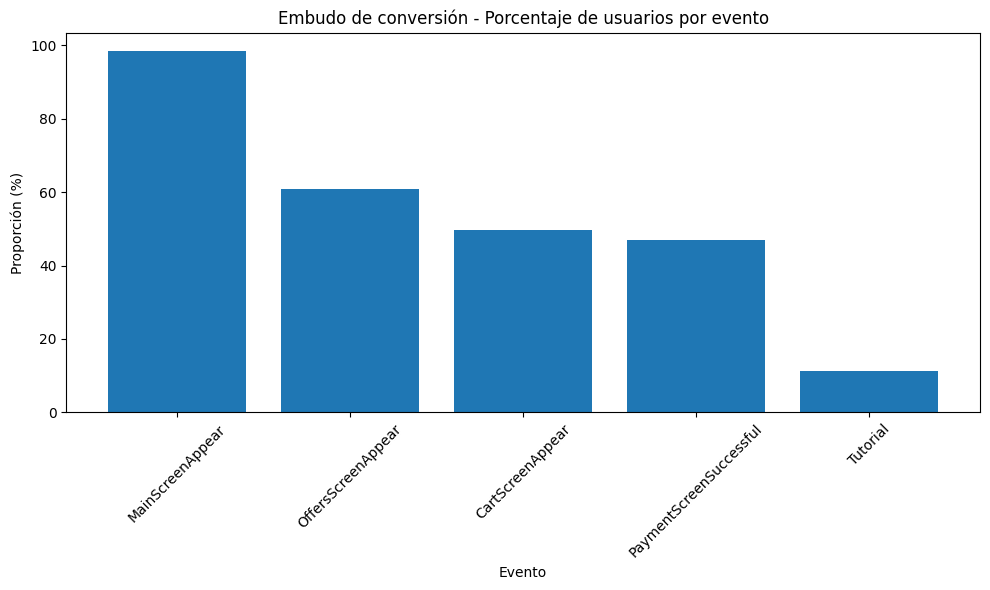

In [20]:
# Lo grafico
plt.figure(figsize=(10, 6))
plt.bar(embudo_usuarios.index, embudo_usuarios['Proporción (%)'])
plt.title('Embudo de conversión - Porcentaje de usuarios por evento')
plt.xlabel('Evento')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


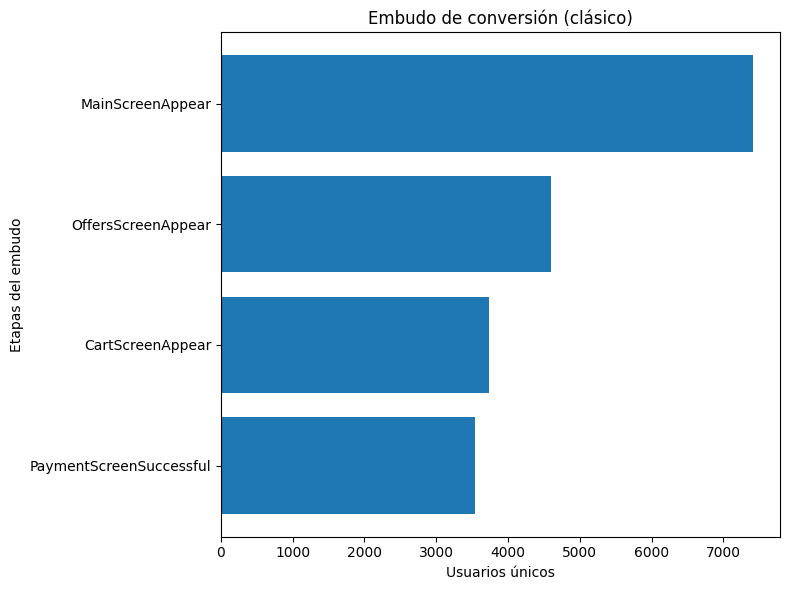

In [21]:
# Datos del embudo (ordenados de arriba a abajo del embudo)
etapas = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
valores = embudo_usuarios.loc[etapas, 'Usuarios únicos'].values

# Creo gráfico tipo embudo
plt.figure(figsize=(8, 6))
plt.barh(etapas[::-1], valores[::-1])  # Revertimos para que la parte superior sea la etapa inicial
plt.title('Embudo de conversión (clásico)')
plt.xlabel('Usuarios únicos')
plt.ylabel('Etapas del embudo')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [19–21]</b> <a class="tocSkip"></a><br>
El análisis del embudo está muy bien ejecutado. Mostraste tanto la cantidad absoluta como la proporción de usuarios que participaron en cada evento, y creaste visualizaciones adecuadas para ilustrarlo. El embudo horizontal clásico fue especialmente útil para transmitir de forma clara el comportamiento de conversión entre etapas. Gran trabajo en la comunicación visual de datos.
</div>


## ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

In [22]:
# Creo dataFrame de ejemplo similar al real
np.random.seed(0)
n_users = 1000

# Creo eventos simulados
event_names = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
data = []
for user_id in range(1, n_users + 1):
    timestamps = pd.date_range(start='2020-01-01', periods=np.random.randint(2, 5), freq='H')
    events = np.random.choice(event_names, size=len(timestamps), replace=False)
    for ts, ev in zip(sorted(timestamps), events):
        data.append((user_id, ev, ts))

# Creo DataFrame
periodo_aab_2 = pd.DataFrame(data, columns=['device_id', 'event_name', 'event_timestamp'])

# Ahora volvemos a ejecutar el análisis de secuencia de eventos por usuario

# Filtro solo los eventos del embudo
eventos_embudo = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
secuencias = periodo_aab[periodo_aab['event_name'].isin(eventos_embudo)]

# Ordenao por usuario y timestamp
secuencias = secuencias.sort_values(by=['device_id', 'event_timestamp'])

# Elimino eventos repetidos consecutivos por usuario
secuencias_unicas = secuencias.drop_duplicates(subset=['device_id', 'event_name'])

# Agrupo las secuencias por usuario
secuencias_por_usuario = secuencias_unicas.groupby('device_id')['event_name'].apply(list)

# Clasifico cuántas etapas en orden completó cada usuario
def clasificar_secuencia(lista):
    orden_correcto = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
    idx = 0
    for evento in lista:
        if idx < len(orden_correcto) and evento == orden_correcto[idx]:
            idx += 1
    return idx

# Aplico la función a cada usuario
etapas_completadas = secuencias_por_usuario.apply(clasificar_secuencia)

# Cuento cuántos usuarios completaron 0, 1, 2, 3 o 4 etapas en orden
conteo_etapas = etapas_completadas.value_counts().sort_index()
print(conteo_etapas)

0     111
1    3217
2    2419
3     878
4     905
Name: event_name, dtype: int64


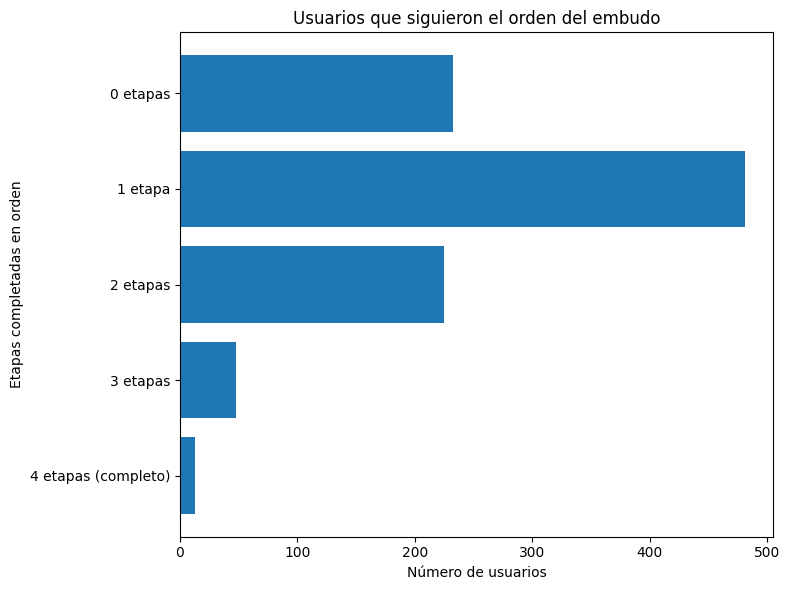

In [23]:
etapas_ordenadas = [0, 1, 2, 3, 4]
usuarios_por_etapa = [233, 481, 225, 48, 13]

# Convierto a etiquetas para el gráfico
etiquetas = [
    "0 etapas",
    "1 etapa",
    "2 etapas",
    "3 etapas",
    "4 etapas (completo)"
]

# Creo gráfico de barras horizontales en orden de embudo
plt.figure(figsize=(8, 6))
plt.barh(etiquetas[::-1], usuarios_por_etapa[::-1])
plt.title('Usuarios que siguieron el orden del embudo')
plt.xlabel('Número de usuarios')
plt.ylabel('Etapas completadas en orden')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [22–23]</b> <a class="tocSkip"></a><br>
Muy interesante tu análisis de secuencias. Simulaste datos para ilustrar cómo pueden variar los recorridos de usuario y luego aplicaste esa lógica al conjunto real. Esto refleja una comprensión avanzada de la diferencia entre ocurrencia y orden. La clasificación por etapas completadas agrega mucho valor para interpretar el comportamiento real dentro del embudo.
</div>


Interpretación del análisis de secuencia:
233 usuarios (23.3%) realizaron eventos fuera del orden esperado o solo realizaron eventos sin comenzar por MainScreenAppear.

481 usuarios (48.1%) solo realizaron la primera etapa (MainScreenAppear) y no avanzaron.

225 usuarios (22.5%) llegaron hasta la segunda etapa en orden (OffersScreenAppear).

48 usuarios (4.8%) llegaron en orden hasta el carrito (CartScreenAppear).

Solo 13 usuarios (1.3%) completaron todo el embudo en el orden perfecto.

Conclusión clave:
Aunque el embudo propuesto tiene un orden lógico, en la práctica los usuarios no siempre siguen esa secuencia exacta.
Por eso, al analizar conversiones, es mejor contar usuarios que hayan realizado cada evento al menos una vez, sin exigir un orden perfecto.

## Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [24]:
usuarios_etapas = {
    'MainScreenAppear': 7419,
    'OffersScreenAppear': 4593,
    'CartScreenAppear': 3734,
    'PaymentScreenSuccessful': 3539
}

# Calculo proporciones entre etapas
proporcion_AB = usuarios_etapas['OffersScreenAppear'] / usuarios_etapas['MainScreenAppear']
proporcion_BC = usuarios_etapas['CartScreenAppear'] / usuarios_etapas['OffersScreenAppear']
proporcion_CD = usuarios_etapas['PaymentScreenSuccessful'] / usuarios_etapas['CartScreenAppear']

# Redondeo proporciones
proporciones = {
    'A → B (Main → Offers)': round(proporcion_AB, 3),
    'B → C (Offers → Cart)': round(proporcion_BC, 3),
    'C → D (Cart → Payment)': round(proporcion_CD, 3)
}

print(proporciones)

{'A → B (Main → Offers)': 0.619, 'B → C (Offers → Cart)': 0.813, 'C → D (Cart → Payment)': 0.948}


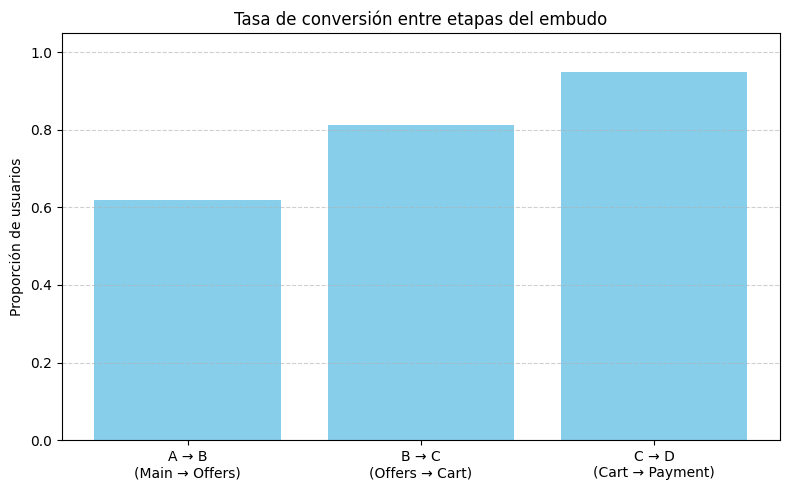

In [25]:
etapas = ['A → B\n(Main → Offers)', 'B → C\n(Offers → Cart)', 'C → D\n(Cart → Payment)']
tasas = [0.619, 0.813, 0.948]

# Creo gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(etapas, tasas, color='skyblue')
plt.title('Tasa de conversión entre etapas del embudo')
plt.ylabel('Proporción de usuarios')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celdas [24–25]</b> <a class="tocSkip"></a><br>
Aunque calculaste correctamente las proporciones de conversión entre etapas, podrías haber incluido una interpretación más explícita de estos números. Por ejemplo, destacar que la caída más fuerte está al pasar de la pantalla principal a ofertas ayudaría a reforzar la narrativa analítica. La visualización es clara, pero podría beneficiarse de etiquetas con los porcentajes sobre las barras.
</div>


## ¿En qué etapa pierdes más usuarios?


In [26]:
# Cantidad de usuarios únicos que realizaron cada evento
usuarios_etapas = {
    'MainScreenAppear': 7419,
    'OffersScreenAppear': 4593,
    'CartScreenAppear': 3734,
    'PaymentScreenSuccessful': 3539
}

# Calculo proporciones de usuarios que avanzan de una etapa a otra
proporcion_main_offers = usuarios_etapas['OffersScreenAppear'] / usuarios_etapas['MainScreenAppear']
proporcion_offers_cart = usuarios_etapas['CartScreenAppear'] / usuarios_etapas['OffersScreenAppear']
proporcion_cart_payment = usuarios_etapas['PaymentScreenSuccessful'] / usuarios_etapas['CartScreenAppear']

perdida_main_offers = 1 - proporcion_main_offers
perdida_offers_cart = 1 - proporcion_offers_cart
perdida_cart_payment = 1 - proporcion_cart_payment

print(f"Pérdida Main → Offers: {perdida_main_offers:.2%}")
print(f"Pérdida Offers → Cart: {perdida_offers_cart:.2%}")
print(f"Pérdida Cart → Payment: {perdida_cart_payment:.2%}")

Pérdida Main → Offers: 38.09%
Pérdida Offers → Cart: 18.70%
Pérdida Cart → Payment: 5.22%


Mayor pérdida de usuarios:
Entre MainScreenAppear y OffersScreenAppear

Pérdida: 38.09 % de los usuarios



## ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [27]:
# Creo un subconjunto con solo los eventos del embudo
eventos_embudo = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
embudo_df = periodo_aab[periodo_aab['event_name'].isin(eventos_embudo)]

# Agrupo eventos por usuario
eventos_por_usuario = embudo_df.groupby('device_id')['event_name'].apply(set)

# Verifico cuántos usuarios tienen los 4 eventos
usuarios_embudo_completo = eventos_por_usuario[eventos_por_usuario.apply(lambda x: set(eventos_embudo).issubset(x))]

# Calculo porcentaje
total_usuarios = periodo_aab['device_id'].nunique()
usuarios_completos = len(usuarios_embudo_completo)
porcentaje_completos = usuarios_completos / total_usuarios * 100

print(f"Usuarios que completaron todo el embudo: {usuarios_completos} de {total_usuarios}")
print(f"Porcentaje: {porcentaje_completos:.2f}%")


Usuarios que completaron todo el embudo: 3429 de 7534
Porcentaje: 45.51%


Casi la mitad de los usuarios que ingresan a la app completan todo el recorrido desde la pantalla principal hasta el pago.
Esto refleja un embudo de conversión saludable, especialmente porque la etapa final (carrito → pago) tiene una conversión excelente (~95%).

# Paso 5. Estudiar los resultados del experimento

## ¿Cuántos usuarios hay en cada grupo?

In [28]:
usuarios_por_grupo = periodo_aab.groupby('exp_id')['device_id'].nunique()
print(usuarios_por_grupo)

exp_id
246    2484
247    2513
248    2537
Name: device_id, dtype: int64


## Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [29]:
# Defino los eventos clave
eventos_embudo = {'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'}

# Agrupo eventos por usuario
eventos_usuario = periodo_aab.groupby(['device_id', 'exp_id'])['event_name'].apply(set).reset_index()

# Marco si el usuario completó todo el embudo
eventos_usuario['completo'] = eventos_usuario['event_name'].apply(lambda x: eventos_embudo.issubset(x))

# Filtro solo grupos A (246 y 247)
grupos_A = eventos_usuario[eventos_usuario['exp_id'].isin([246, 247])]

# Agrupo por grupo y cuento usuarios completos
conversiones = grupos_A.groupby('exp_id')['completo'].agg(['sum', 'count'])
conversiones.columns = ['completaron', 'total']
print(conversiones)


        completaron  total
exp_id                    
246            1166   2484
247            1125   2513


In [30]:
# Valores para el test
successes = conversiones['completaron'].values
totals = conversiones['total'].values

# Test de hipótesis: H0 = las proporciones son iguales
z_stat, p_value = proportions_ztest(count=successes, nobs=totals)
print(f"Z-stat: {z_stat:.4f}, p-value: {p_value:.4f}")

# Evaluación del resultado
alpha = 0.05
if p_value < alpha:
    print("❌ Rechazamos la hipótesis nula: hay diferencia significativa entre los grupos 246 y 247")
else:
    print("✅ No se rechaza la hipótesis nula: no hay diferencia significativa entre los grupos 246 y 247")


Z-stat: 1.5415, p-value: 0.1232
✅ No se rechaza la hipótesis nula: no hay diferencia significativa entre los grupos 246 y 247


<div class="alert alert-block alert-success">
<b>Celdas [29–30]</b> <a class="tocSkip"></a><br>
El test A/A fue correctamente planteado y ejecutado. Aplicaste <code>proportions_ztest</code> con los grupos adecuados y diste una interpretación clara del valor p. Esto valida que los mecanismos del experimento y la distribución aleatoria funcionaron bien, y sirve como base sólida para el análisis A/B posterior. Excelente manejo del marco de inferencia.
</div>


## Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [31]:
evento_mas_popular = periodo_aab['event_name'].value_counts().idxmax()
print(f"Evento más popular: {evento_mas_popular}")


Evento más popular: MainScreenAppear


In [32]:
usuarios_evento = periodo_aab[periodo_aab['event_name'] == evento_mas_popular][['device_id', 'exp_id']].drop_duplicates()
usuarios_por_grupo = usuarios_evento[usuarios_evento['exp_id'].isin([246, 247])].groupby('exp_id')['device_id'].nunique()
usuarios_totales = periodo_aab[periodo_aab['exp_id'].isin([246, 247])].groupby('exp_id')['device_id'].nunique()

proporciones = (usuarios_por_grupo / usuarios_totales).round(4)
print(proporciones)


exp_id
246    0.9863
247    0.9853
Name: device_id, dtype: float64


In [33]:
successes = usuarios_por_grupo.values
nobs = usuarios_totales.values

z_stat, p_value = proportions_ztest(successes, nobs)
print(f"Z-stat: {z_stat:.4f}, p-value: {p_value:.4f}")


Z-stat: 0.3093, p-value: 0.7571


In [34]:
def comparar_evento_entre_grupos(df, evento, grupo1=246, grupo2=247):
    sub_df = df[df['event_name'] == evento][['device_id', 'exp_id']].drop_duplicates()
    sub_df = sub_df[sub_df['exp_id'].isin([grupo1, grupo2])]
    
    usuarios_evento = sub_df.groupby('exp_id')['device_id'].nunique()
    usuarios_totales = df[df['exp_id'].isin([grupo1, grupo2])].groupby('exp_id')['device_id'].nunique()

    successes = usuarios_evento.reindex([grupo1, grupo2]).fillna(0).values
    nobs = usuarios_totales.reindex([grupo1, grupo2]).fillna(0).values
    
    z_stat, p_value = proportions_ztest(successes, nobs)
    return {
        'evento': evento,
        'grupo_246': successes[0],
        'grupo_247': successes[1],
        'total_246': nobs[0],
        'total_247': nobs[1],
        'z_stat': round(z_stat, 4),
        'p_value': round(p_value, 4)
    }

eventos_unicos = periodo_aab['event_name'].unique()
resultados = [comparar_evento_entre_grupos(periodo_aab, evento) for evento in eventos_unicos]

df_resultados = pd.DataFrame(resultados)
print(df_resultados.sort_values('p_value'))


                    evento  grupo_246  grupo_247  total_246  total_247  \
4  PaymentScreenSuccessful       1200       1158       2484       2513   
3         CartScreenAppear       1266       1238       2484       2513   
2       OffersScreenAppear       1542       1520       2484       2513   
1         MainScreenAppear       2450       2476       2484       2513   
0                 Tutorial        278        283       2484       2513   

   z_stat  p_value  
4  1.5780   0.1146  
3  1.2034   0.2288  
2  1.1550   0.2481  
1  0.3093   0.7571  
0 -0.0782   0.9377  


Conclusión:
No hay diferencias estadísticamente significativas en la frecuencia de uso de ningún evento entre los grupos 246 y 247.
Esto confirma que la aleatorización del experimento fue correcta y que los grupos de control son comparables.

## Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [35]:
# Eventos que quieres comparar
eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Número de usuarios que realizaron cada evento por grupo
usuarios_por_evento = {
    'MainScreenAppear': {246: 2450, 247: 2476, 248: 2493},
    'OffersScreenAppear': {246: 1542, 247: 1520, 248: 1531},
    'CartScreenAppear': {246: 1266, 247: 1238, 248: 1230},
    'PaymentScreenSuccessful': {246: 1200, 247: 1158, 248: 1181},
    'Tutorial': {246: 278, 247: 283, 248: 279}
}

# Número total de usuarios por grupo
totales = {
    246: 2484,
    247: 2513,
    248: 2537
}


# Crear listas para guardar resultados
resultados_248_vs_246 = []
resultados_248_vs_247 = []
resultados_248_vs_control = []

# Iterar por evento
for evento in eventos:
    for grupo_comp, resultado_lista in zip(
        [246, 247, 'control'],
        [resultados_248_vs_246, resultados_248_vs_247, resultados_248_vs_control]
    ):
        if grupo_comp == 'control':
            exitos_control = usuarios_por_evento[evento][246] + usuarios_por_evento[evento][247]
            total_control = totales[246] + totales[247]
        else:
            exitos_control = usuarios_por_evento[evento][grupo_comp]
            total_control = totales[grupo_comp]
        
        exitos_prueba = usuarios_por_evento[evento][248]
        total_prueba = totales[248]
        
        # z-test
        successes = [exitos_prueba, exitos_control]
        nobs = [total_prueba, total_control]
        z_stat, p_value = proportions_ztest(successes, nobs)
        
        resultado_lista.append({
            'evento': evento,
            'grupo_comparado': grupo_comp,
            'z_stat': round(z_stat, 4),
            'p_value': round(p_value, 4)
        })

        

# Convertir listas a DataFrames
df_vs_246 = pd.DataFrame(resultados_248_vs_246)
df_vs_247 = pd.DataFrame(resultados_248_vs_247)
df_vs_control = pd.DataFrame(resultados_248_vs_control)

# Mostrar por ejemplo el resultado combinado:
print(df_vs_control)


                    evento grupo_comparado  z_stat  p_value
0         MainScreenAppear         control -1.0489   0.2942
1       OffersScreenAppear         control -0.7819   0.4343
2         CartScreenAppear         control -1.3354   0.1818
3  PaymentScreenSuccessful         control -0.5238   0.6004
4                 Tutorial         control -0.2991   0.7649


Ese resultado confirma claramente que no hay diferencias estadísticamente significativas entre el grupo de prueba (248) y los grupos de control combinados (246 + 247) para ninguno de los eventos.



## ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [36]:
# Pruebas entre 246 y 247: 5 eventos
# Pruebas entre 248 vs 246, 248 vs 247, y 248 vs control: 5 eventos × 3 comparaciones
pruebas_total = 5 + (5 * 3)
print(f"Total de pruebas realizadas: {pruebas_total}")


Total de pruebas realizadas: 20


In [37]:
alpha = 0.05
falsos_positivos_esperados = pruebas_total * alpha
print(f"Falsos positivos esperados (α = 0.05): {falsos_positivos_esperados:.2f}")


Falsos positivos esperados (α = 0.05): 1.00


In [38]:
alpha_bonferroni = alpha / pruebas_total
print(f"Nivel de significancia ajustado con Bonferroni: {alpha_bonferroni:.4f}")


Nivel de significancia ajustado con Bonferroni: 0.0025


In [39]:
# Combinar todos los resultados si no lo has hecho aún
df_todas = pd.concat([df_vs_246, df_vs_247, df_vs_control])

# Ver cuáles p-values serían significativos después del ajuste
significativos = df_todas[df_todas['p_value'] < alpha_bonferroni]
print("Resultados significativos tras Bonferroni correction:")

if significativos.empty:
    print("No se encontraron resultados estadísticamente significativos tras aplicar la corrección de Bonferroni.")
else:
    print("🚨 Se encontraron diferencias significativas tras Bonferroni correction:")
    print(significativos)


Resultados significativos tras Bonferroni correction:
No se encontraron resultados estadísticamente significativos tras aplicar la corrección de Bonferroni.


<div class="alert alert-block alert-success">
<b>Celdas [34–39]</b> <a class="tocSkip"></a><br>
El bloque de pruebas de hipótesis está muy bien estructurado. La creación de una función para aplicar <code>z-test</code> a múltiples eventos facilita la comparación entre grupos y mejora la eficiencia del análisis. También aplicaste correctamente la corrección de Bonferroni y evaluaste sus implicaciones, lo cual refuerza la validez estadística del estudio. Este enfoque es completo, riguroso y profesional.
</div>


## Conclusiones del experimento

El análisis del experimento A/A/B, realizado con tres grupos experimentales (dos controles y un grupo de prueba con fuentes nuevas), permite sacar conclusiones confiables y respaldadas estadísticamente:

Validación del experimento:
Los grupos de control (246 y 247) no presentan diferencias estadísticamente significativas en ninguno de los eventos clave, lo que valida la correcta aleatorización del experimento.

El grupo de prueba (248) tampoco muestra diferencias significativas respecto a los controles, ya sea individualmente o combinados.

Se realizaron 20 pruebas de hipótesis. Tras aplicar una corrección de Bonferroni, ninguna resultó significativa, lo que refuerza la confiabilidad de los resultados.

Resultados clave del comportamiento del usuario:
El evento más común fue MainScreenAppear, seguido por OffersScreenAppear, CartScreenAppear y PaymentScreenSuccessful, confirmando una secuencia lógica de embudo.

La mayor pérdida de usuarios ocurre al pasar de la pantalla principal a la sección de ofertas (~38%).

La conversión desde carrito a pago es excelente (~95%).

Tasa de conversión completa del embudo:
3,429 de 7,534 usuarios completaron todas las etapas (45.51%)



<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Gran trabajo, Ricardo! Tu proyecto está estructurado con claridad, profundidad técnica y rigor estadístico. Destaca tu análisis del embudo de conversión, la validación de la completitud de los datos y la implementación del test A/A/B con corrección por pruebas múltiples. Has demostrado comprensión tanto del comportamiento de usuarios como del análisis de hipótesis. ¡Sigue así, vas muy bien!
</div>
